<span style="color:#5EEAD4; font-size:36px; font-weight:bold;">
Sleep Health & Lifestyle — Data Visualization
</span>

<div style="background:#243F36; padding:14px; border-radius:10px; margin-top:15px;">
  <p style="color:#B4E9D6; font-size:15px; margin:0;">
    Essential libraries
  </p>
</div>

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<div style="background:#243F36; padding:14px; border-radius:10px; margin-top:15px;">
  <p style="color:#B4E9D6; font-size:15px; margin:0;">
    Backend and Theme Setting
  </p>
</div>


In [73]:
%matplotlib inline

In [74]:
palette = [
    '#2d50da',
    '#1edbe5',  
    '#ae307c']

In [75]:
sns.set_palette(palette)
sns.set_style('darkgrid')

<div style="background:#243F36; padding:14px; border-radius:10px; margin-top:15px;">
  <p style="color:#B4E9D6; font-size:15px; margin:0;">
    Loading the Data
  </p>
</div>


In [76]:
df = pd.read_csv('data\\Sleep_health_and_lifestyle_dataset.csv')

<div style="background:#243F36; padding:14px; border-radius:10px; margin-top:15px;">
  <p style="color:#B4E9D6; font-size:15px; margin:0;">
    Exploratory Data Analysis
  </p>
</div>


In [77]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [78]:
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


<div style="background:#243F36; padding:14px; border-radius:10px; margin-top:15px;">
  <p style="color:#B4E9D6; font-size:15px; margin:0;">
   Data Preprocessing
  </p>
</div>


In [80]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [81]:
df[['systolic','diastolic']] = df['blood_pressure'].str.split('/', expand=True)
df['systolic'] = df['systolic'].astype(int)
df['diastolic'] = df['diastolic'].astype(int)
df['map'] = df['diastolic'] + (df['systolic'] - df['diastolic']) / 3
df.drop(columns=['blood_pressure', 'diastolic', 'systolic', 'person_id'], inplace=True)
df['sleep_disorder'] = df['sleep_disorder'].fillna('No Sleep Disorder')


In [82]:
df['bmi_category'] = df['bmi_category'].replace('Normal','Normal Weight')

In [83]:
cat = []
num = []
print('Categorical Columns:')
print()
for col in df.columns:
    if df[col].nunique() <= 11:
        cat.append(col)
        print(df[col].value_counts())
        print()
print('-------------------')

print('numerical Columns nunique values:')  
print()
for col in df.columns:
    if df[col].nunique() > 11:
        num.append(col)
        print(f'{col}: {df[col].value_counts()}')
        

Categorical Columns:

gender
Male      189
Female    185
Name: count, dtype: int64

occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

quality_of_sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64

stress_level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64

bmi_category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64

sleep_disorder
No Sleep Disorder    219
Sleep Apnea           78
Insomnia              77
Name: count, dtype: int64

-------------------
numerical Columns nunique values:

age: age
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
29 

<div style="background:#243F36; padding:14px; border-radius:10px; margin-top:15px;">
  <p style="color:#B4E9D6; font-size:15px; margin:0;">
    Object columns are kept as human-readable categories for clear plots.
  </p>
</div>


In [84]:
df_corr = df.copy()

In [85]:
df_corr['gender']  =df_corr['gender'].map({'Male':0, 'Female':1})
df_corr['bmi_category'] = df_corr['bmi_category'].map({'Normal Weight':1, 'Normal':1, 'Overweight':2, 'Obese':3})
df_corr['sleep_disorder'] = df_corr['sleep_disorder'].map({'Sleep Apnea':1, 'Insomnia':2, 'No Sleep Disorder':0})


  <p style="color:#B4E9D6; font-size:15px; margin:0;">
     Encoding categorical occupations as numbers for correlation is misleading, since the numeric values have no real order or distance.
  </p>


In [86]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   374 non-null    int64  
 1   age                      374 non-null    int64  
 2   occupation               374 non-null    object 
 3   sleep_duration           374 non-null    float64
 4   quality_of_sleep         374 non-null    int64  
 5   physical_activity_level  374 non-null    int64  
 6   stress_level             374 non-null    int64  
 7   bmi_category             374 non-null    int64  
 8   heart_rate               374 non-null    int64  
 9   daily_steps              374 non-null    int64  
 10  sleep_disorder           374 non-null    int64  
 11  map                      374 non-null    float64
dtypes: float64(2), int64(9), object(1)
memory usage: 35.2+ KB


<div style="background:#243F36; padding:14px; border-radius:10px; margin-top:15px;">
  <p style="color:#B4E9D6; font-size:15px; margin:0;">
    Visualizations 
  </p>
</div>

<Axes: >

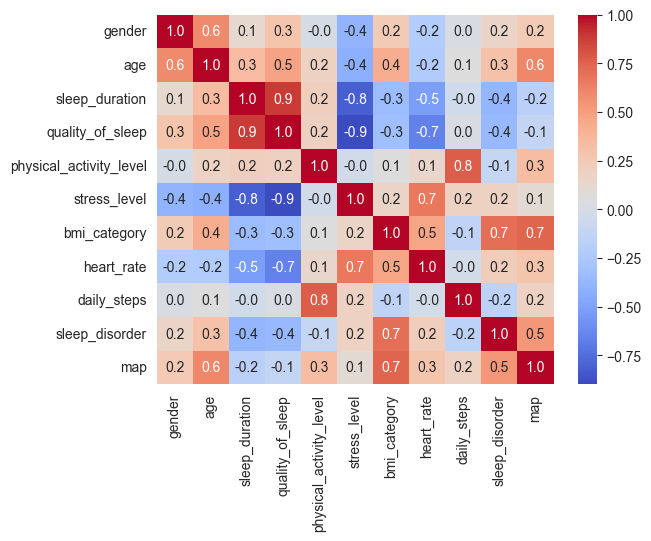

In [87]:
sns.heatmap(
    df_corr.corr(numeric_only=True),
    annot=True, 
    cmap='coolwarm', 
    fmt='.1f')

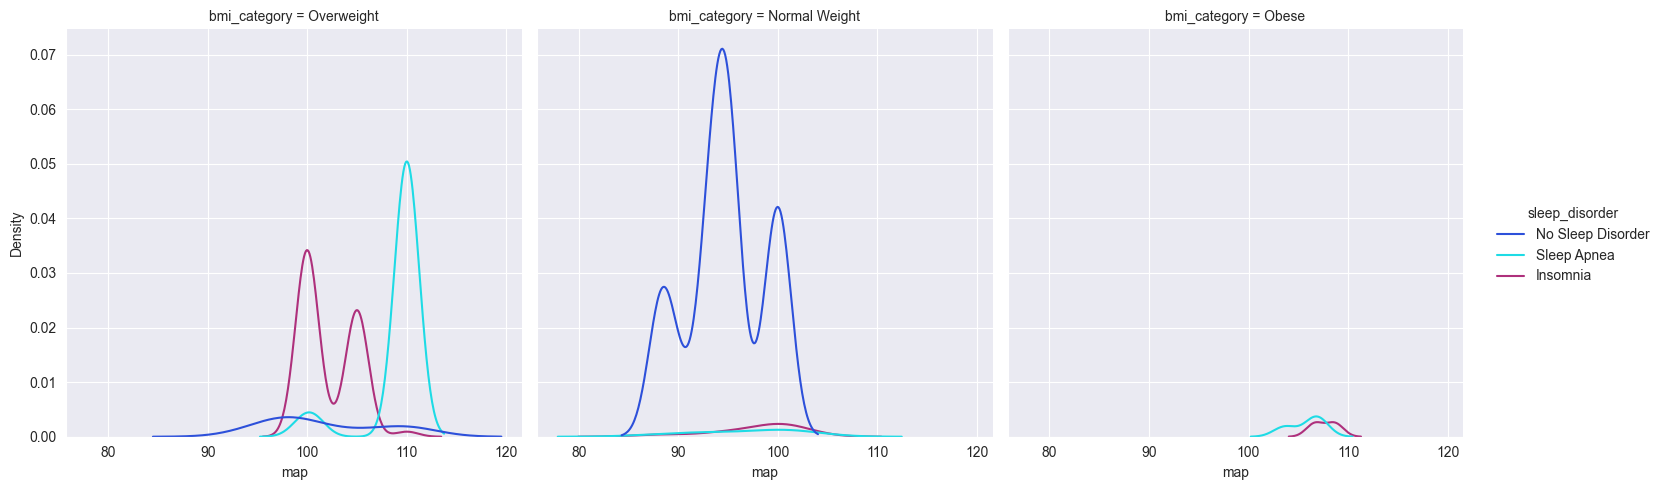

In [88]:
sns.displot(
    data=df, 
    x='map', 
    hue='sleep_disorder',
    col='bmi_category',
    kind='kde')

Text(0.5, 1.0, 'Heart Rate vs Quality of Sleep')

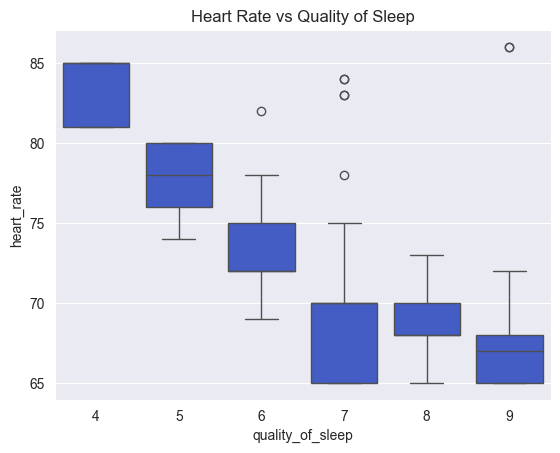

In [89]:
sns.boxplot(
    data=df, 
    x='quality_of_sleep', 
    y='heart_rate')
plt.title('Heart Rate vs Quality of Sleep')

Text(0.5, 1.0, 'Sleep Duration vs Quality of Sleep by Sleep Disorder')

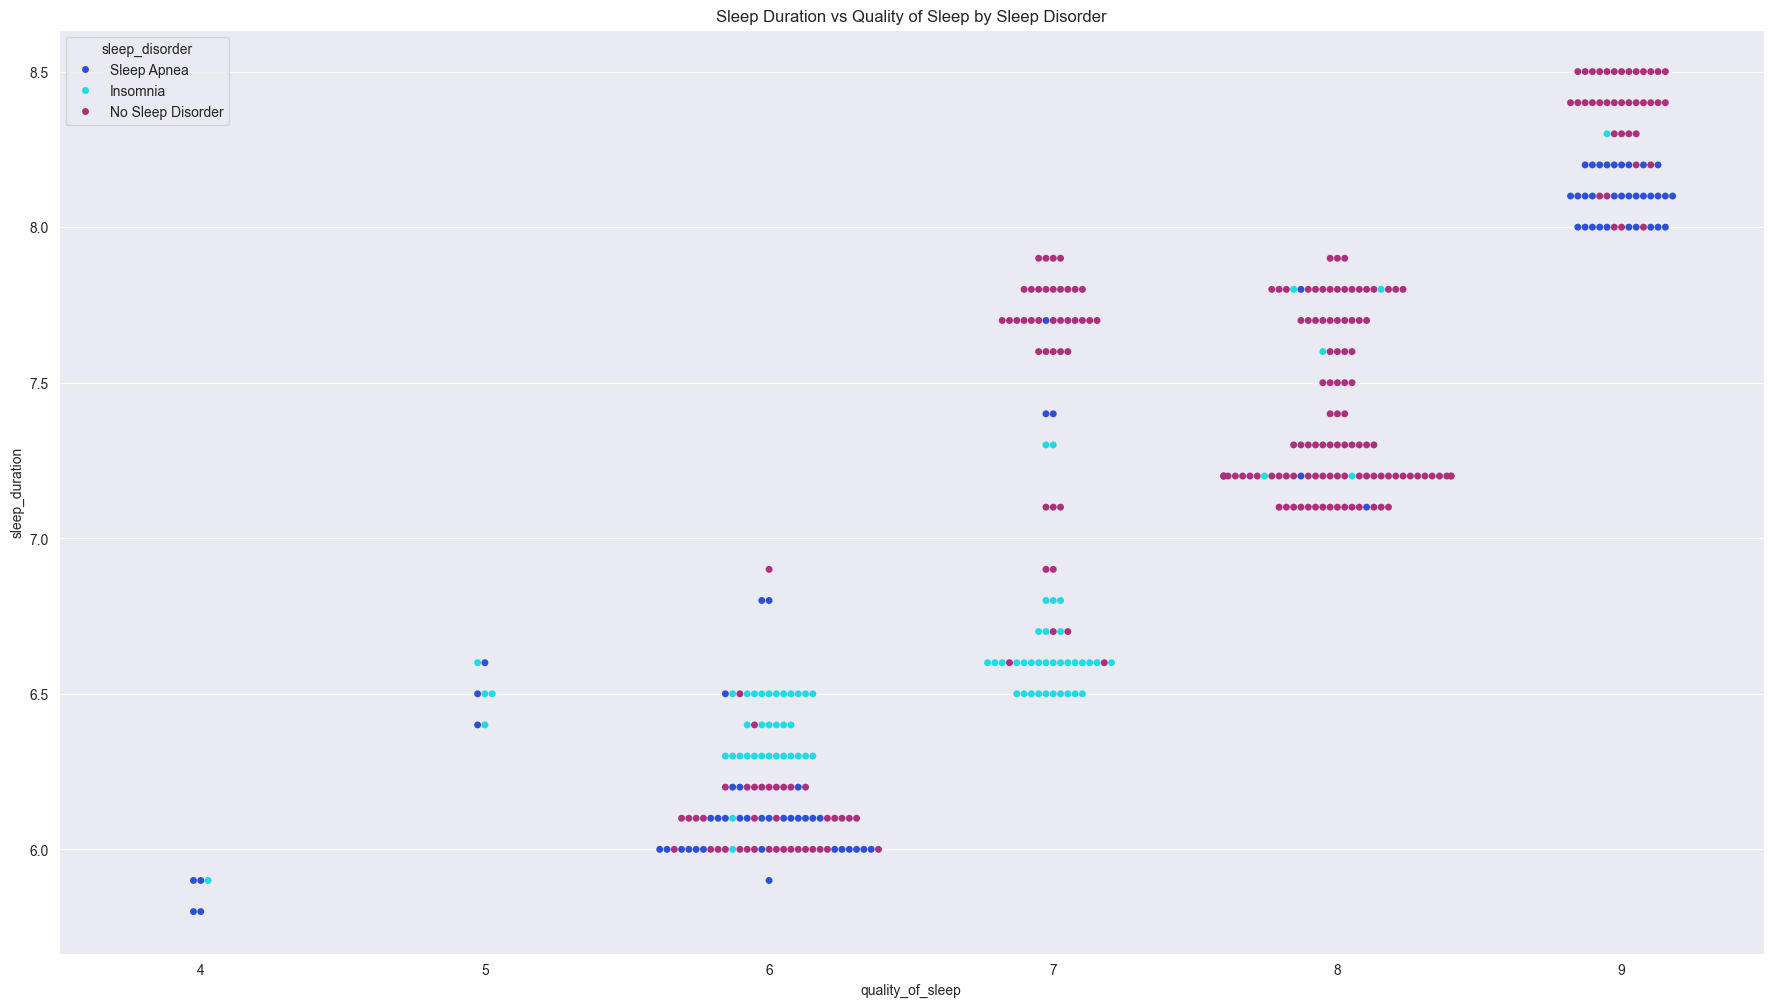

In [90]:
plt.figure(figsize=(22,12))
sns.swarmplot(
    data=df, 
    x='quality_of_sleep', 
    y='sleep_duration', 
    hue='sleep_disorder', 
    palette=palette)
plt.title('Sleep Duration vs Quality of Sleep by Sleep Disorder')

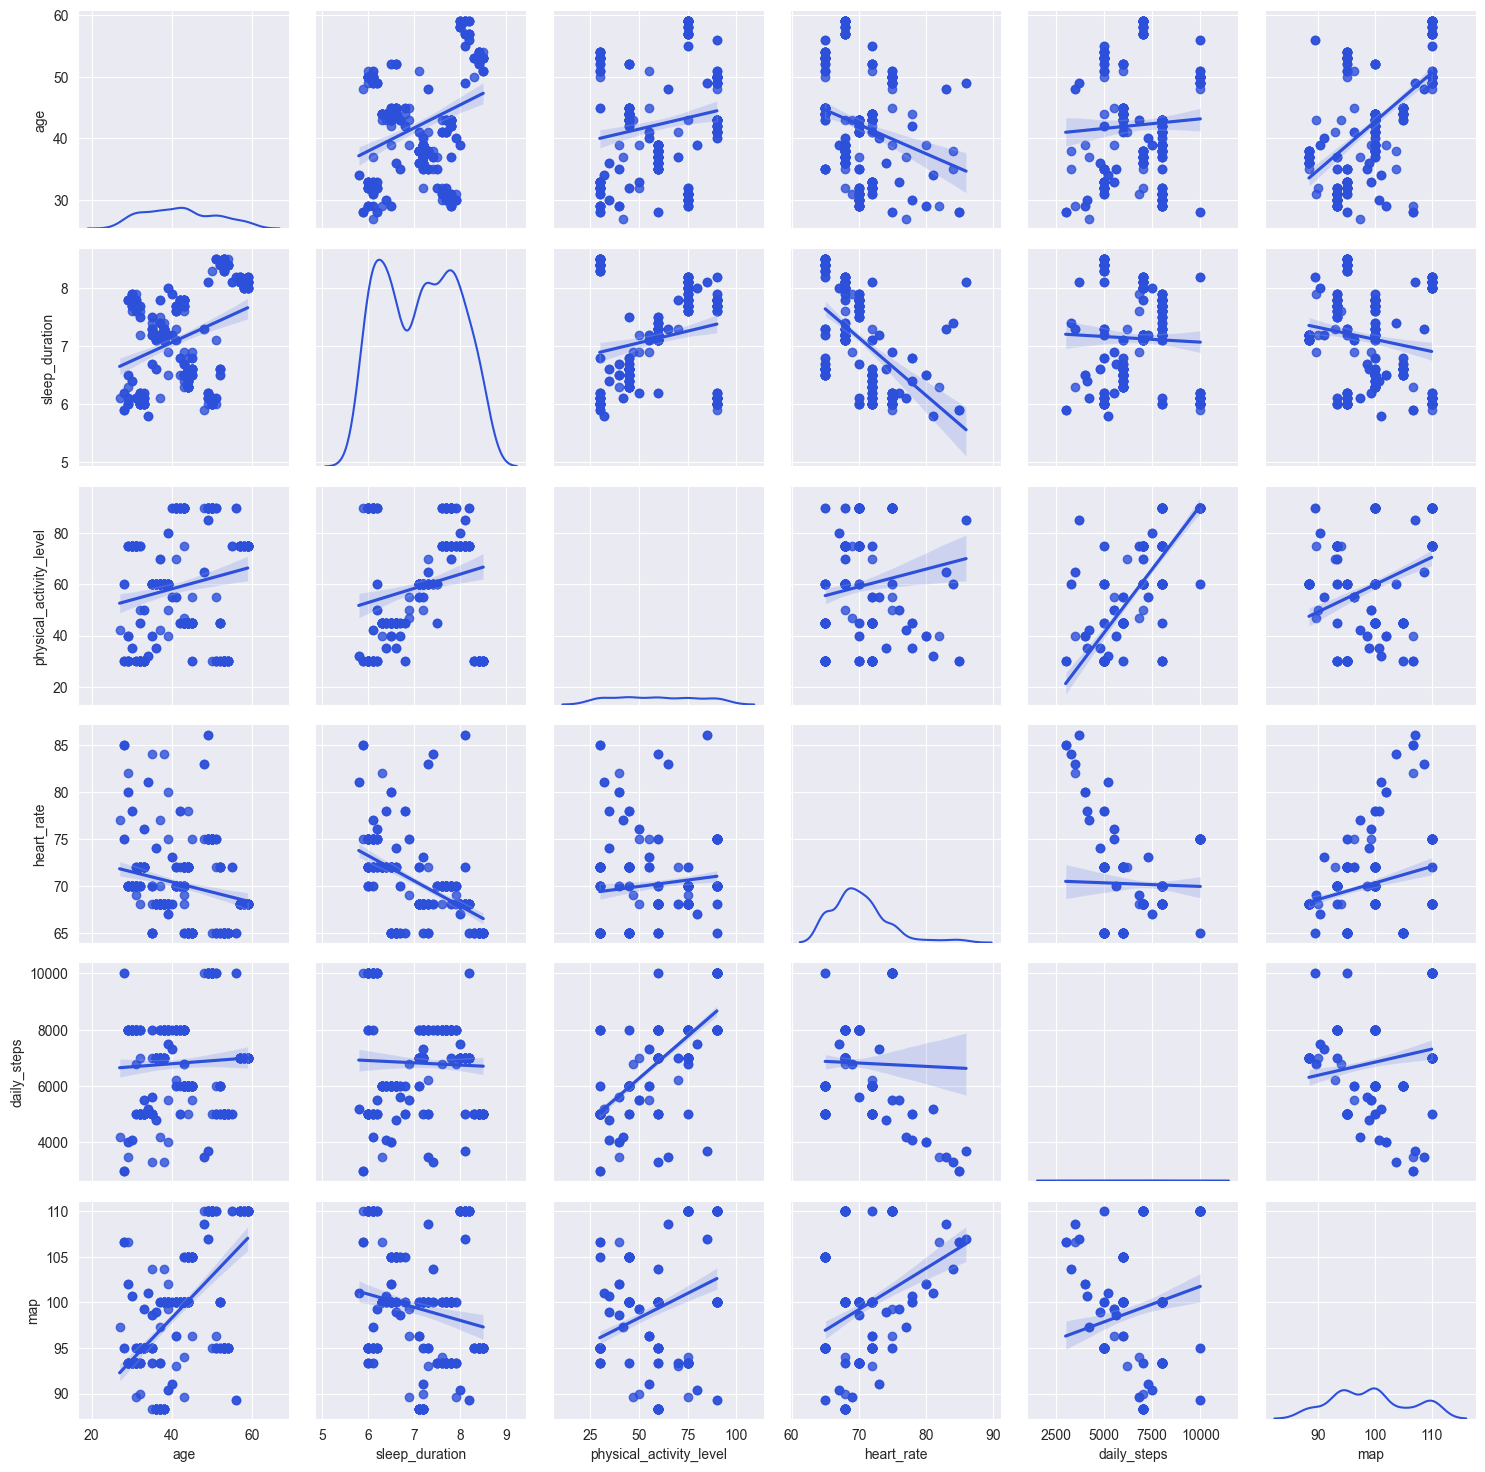

In [91]:
g = sns.PairGrid(df[num])
g.map_diag(sns.kdeplot)
g.map_upper(sns.regplot)
g.map_lower(sns.regplot)

Text(0.5, 1.0, 'Mean Arterial Pressure vs Age')

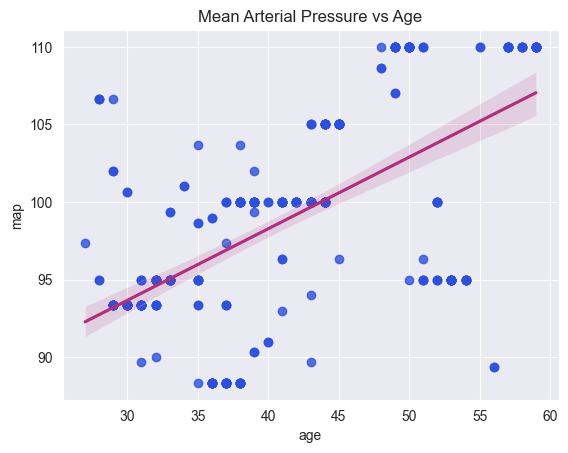

In [92]:
sns.regplot(data=df, 
            x='age',
            y='map',
            line_kws={'color':'#ae307c'})
plt.title('Mean Arterial Pressure vs Age')

Text(0.5, 1.0, 'Sleep Duration vs Heart Rate')

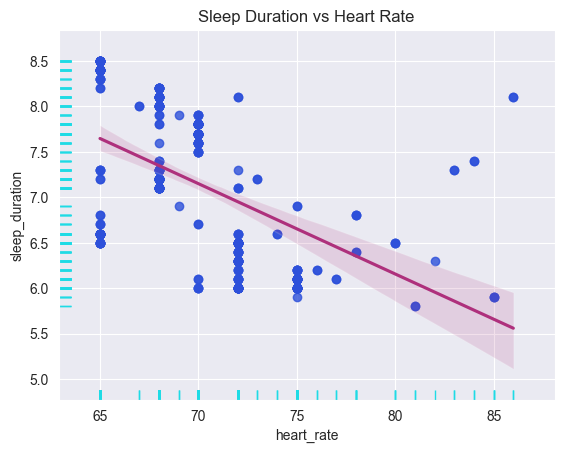

In [93]:
sns.regplot(data=df_corr, 
            x='heart_rate', 
            y='sleep_duration', 
            line_kws={'color':'#ae307c'})

sns.rugplot(data=df_corr, 
            x='heart_rate',
            y='sleep_duration')

plt.title('Sleep Duration vs Heart Rate')

Text(0.5, 1.0, 'MAP by BMI Category and Sleep Disorder')

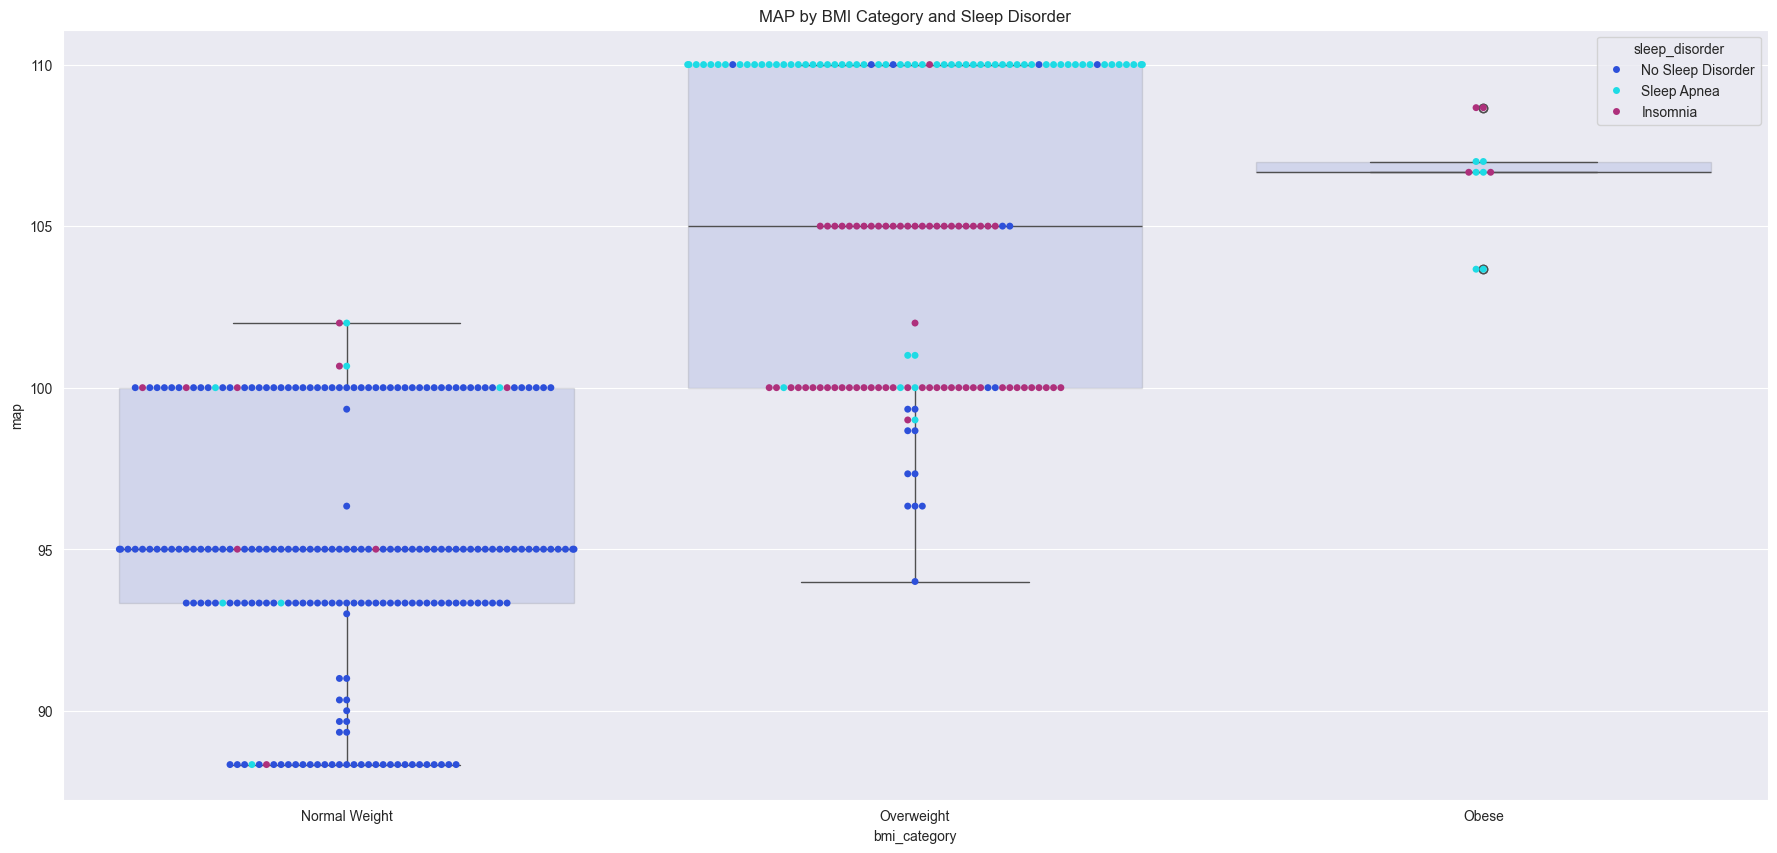

In [94]:
plt.figure(figsize=(22,10))
order=['Normal Weight', 'Overweight', 'Obese']

sns.boxplot(data=df, 
y='map', 
x='bmi_category', 
boxprops=dict(alpha=0.15), 
order=order)

sns.swarmplot(data=df, 
y='map', 
x='bmi_category', 
hue='sleep_disorder', 
palette=palette, 
order=order)

plt.title('MAP by BMI Category and Sleep Disorder')

Text(0.5, 1.0, 'Proportion of People with Sleep Disorder by Occupation')

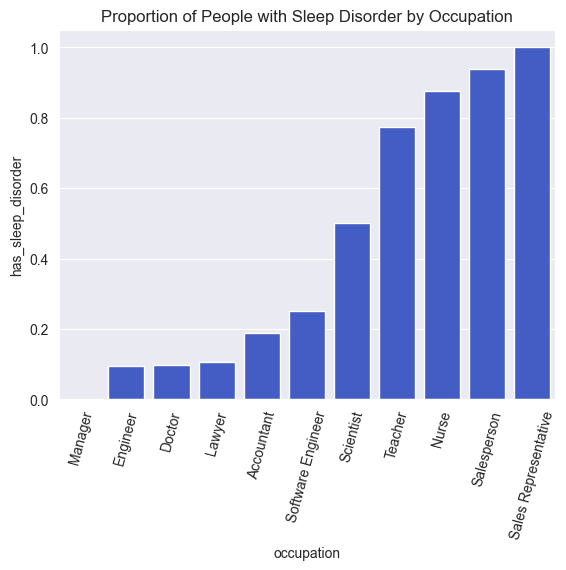

In [95]:
df_corr['has_sleep_disorder'] = np.where(df_corr['sleep_disorder'] > 0, 1, 0)
occupation_avg = df_corr.groupby(['occupation'])['has_sleep_disorder'].mean().sort_values().reset_index()

sns.barplot(
    data=occupation_avg,
    x='occupation',
    y='has_sleep_disorder')

plt.xticks(rotation=75)
plt.title('Proportion of People with Sleep Disorder by Occupation')

Text(0.5, 1.0, 'Average Physical Activity Level by Occupation')

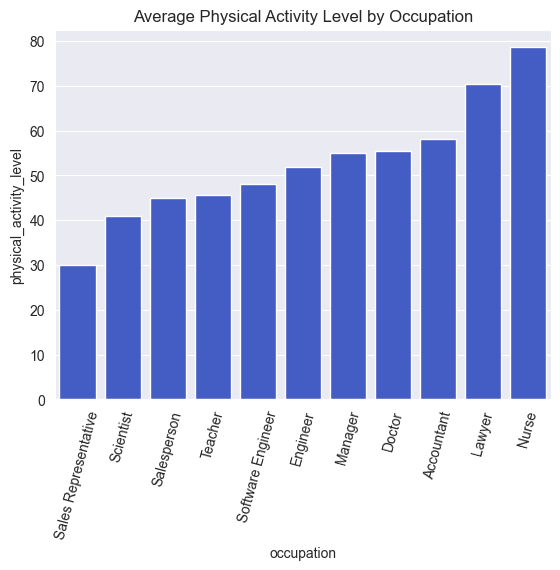

In [96]:
occupation = df.groupby('occupation')['physical_activity_level'].mean().sort_values().reset_index()

sns.barplot(
    data = occupation,
    x = 'occupation',
    y = 'physical_activity_level')
plt.xticks(rotation=75)
plt.title('Average Physical Activity Level by Occupation')

<!-- Neutral Box -->
<div style="background:#333333; padding:14px; border-radius:10px; margin-top:15px;">
  <p style="color:#E6E6E6; font-size:15px; margin:0;">
    Key Findings:
    

Normal-weight individuals showed lower MAP levels and a lower prevalence of sleep disorders.

Overweight individuals exhibited higher rates of sleep disorders, and among them, those with sleep apnea had higher MAP levels compared to those with insomnia.

Higher sleep quality was associated with lower heart rate.

Individuals with sleep apnea formed two distinct clusters:

One cluster had lower sleep quality and shorter sleep duration.

The other cluster had high sleep quality (score ~9) and longer sleep duration.

Individuals with insomnia generally had poor sleep quality and shorter sleep duration.

MAP tended to increase with age.

Heart rate and sleep duration were inversely correlated, with a correlation coefficient of approximately -0.5.

Physical activity levels and the proportion of people with sleep disorders by occupation were also analyzed.
  </p>
</div>